In [2]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as f
from torch.utils.data import DataLoader, Dataset

In [123]:
class my_Dataset(Dataset):
    def __init__(self, dataset : np):
        xy = dataset
        self.len = xy.shape[0]
        self.x_data = torch.Tensor(torch.from_numpy(xy[:, 0:-1]))
        self.y_data = torch.Tensor(xy[:, [-1]])
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    def __len__(self):
        return self.len

In [124]:
xy = np.loadtxt('data/diabetes.csv.gz', delimiter=',', dtype='float32')
dataset = my_Dataset(xy)

In [125]:
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [126]:
class My_Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(8,6)
        self.fc2 = nn.Linear(6,4)
        self.fc3 = nn.Linear(4,1)

        self.sigmoid = nn.Sigmoid()


    def forward(self, x):
        out1 = f.sigmoid(self.fc1(x))
        out2 = f.sigmoid(self.fc2(out1))
        out3 = f.sigmoid(self.fc3(out2))


        return out3


In [127]:
model = My_Model()

criteria = torch.nn.BCELoss(size_average=True)
optim = torch.optim.SGD(model.parameters(), lr=0.1)

In [130]:
losses = []
epoch_index = 0
for epoch in range(3):
    print(f"{epoch + 1} 에포크 시작")
    for i, data in enumerate(train_loader,0):
        epoch_index += 1
        inputs, label = data
        print(f"{i+1} 배치 훈련 중")
        inputs, label = torch.Tensor(inputs), torch.Tensor(label)
        y_pred = model(inputs)

        loss = criteria(y_pred, label)
        losses.append(loss.data.item())
        print(f"배치 사이즈 : {epoch+1}, 에포크 : {i+1}, 손실도 : {loss.data}")

        optim.zero_grad()
        loss.backward()
        optim.step()
    print(f"{epoch + 1} 에포크 종료")

1 에포크 시작
1 배치 훈련 중
배치 사이즈 : 1, 에포크 : 1, 손실도 : 0.626510739326477
2 배치 훈련 중
배치 사이즈 : 1, 에포크 : 2, 손실도 : 0.6438295841217041
3 배치 훈련 중
배치 사이즈 : 1, 에포크 : 3, 손실도 : 0.6260210275650024
4 배치 훈련 중
배치 사이즈 : 1, 에포크 : 4, 손실도 : 0.71755450963974
5 배치 훈련 중
배치 사이즈 : 1, 에포크 : 5, 손실도 : 0.5561509132385254
6 배치 훈련 중
배치 사이즈 : 1, 에포크 : 6, 손실도 : 0.6624913811683655
7 배치 훈련 중
배치 사이즈 : 1, 에포크 : 7, 손실도 : 0.6623735427856445
8 배치 훈련 중
배치 사이즈 : 1, 에포크 : 8, 손실도 : 0.6620907187461853
9 배치 훈련 중
배치 사이즈 : 1, 에포크 : 9, 손실도 : 0.6985068917274475
10 배치 훈련 중
배치 사이즈 : 1, 에포크 : 10, 손실도 : 0.6083959341049194
11 배치 훈련 중
배치 사이즈 : 1, 에포크 : 11, 손실도 : 0.6437781453132629
12 배치 훈련 중
배치 사이즈 : 1, 에포크 : 12, 손실도 : 0.62521892786026
13 배치 훈련 중
배치 사이즈 : 1, 에포크 : 13, 손실도 : 0.5685024261474609
14 배치 훈련 중
배치 사이즈 : 1, 에포크 : 14, 손실도 : 0.6433357000350952
15 배치 훈련 중
배치 사이즈 : 1, 에포크 : 15, 손실도 : 0.6628841757774353
16 배치 훈련 중
배치 사이즈 : 1, 에포크 : 16, 손실도 : 0.5842310786247253
17 배치 훈련 중
배치 사이즈 : 1, 에포크 : 17, 손실도 : 0.8049839735031128
18 배치 훈련 중
배치 사이즈 : 1, 에포크 :

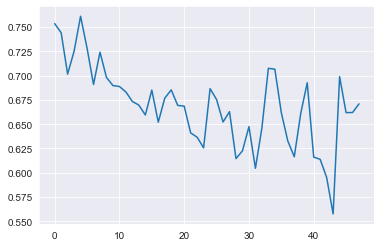

In [129]:
import matplotlib.pyplot as plt

plt.plot(range(epoch_index), losses)
plt.show()